---
title: "FAQ"
execute:
  freeze: auto  # re-render only when source changes
format:
  html:
    toc: true
    toc-location: body
---

## How to resample by year, but have it end in September?

This is called [anchored offset](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets). One possible use to it is to calculate statistics according to the hydrological year that, for example, ends in September.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)  # white graphs, with large and legible letters

In [2]:
filename = "../archive/data/Kinneret_Kvuza_daily_rainfall.csv"
df = pd.read_csv(filename, na_values=['-'])
df.rename(columns={'Date': 'date',
                   'Daily Rainfall (mm)': 'rain'}, inplace=True)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df = df.set_index('date')
df = df.resample('D').asfreq().fillna(0)  # asfreq = replace
df

,Station,rain
date,,
1980-01-02,Kinneret Kvuza 09/1977-08/2023,0.0
1980-01-03,0,0.0
1980-01-04,0,0.0
1980-01-05,Kinneret Kvuza 09/1977-08/2023,35.5
1980-01-06,Kinneret Kvuza 09/1977-08/2023,2.2
...,...,...
2019-12-26,Kinneret Kvuza 09/1977-08/2023,39.4
2019-12-27,Kinneret Kvuza 09/1977-08/2023,5.2
2019-12-28,Kinneret Kvuza 09/1977-08/2023,1.6


Text(0.5, 1.0, 'Kvutzat Kinneret')

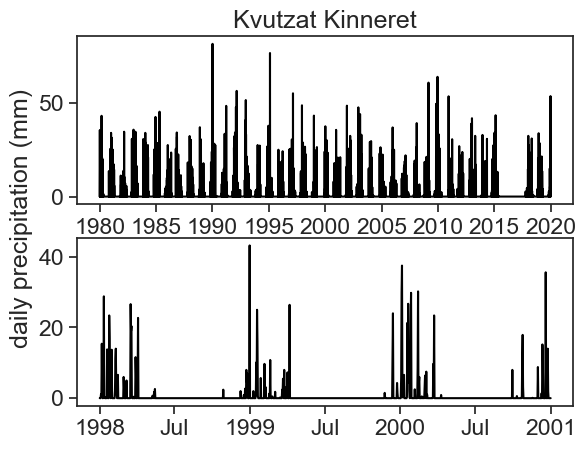

In [3]:
fig, ax = plt.subplots(2,1)
ax[0].plot(df['rain'], color='black')
ax[1].plot(df.loc['1998':'2000', 'rain'], color='black')
locator = mdates.AutoDateLocator(minticks=4, maxticks=8)
formatter = mdates.ConciseDateFormatter(locator)
ax[1].xaxis.set_major_locator(locator)
ax[1].xaxis.set_major_formatter(formatter)
fig.text(0.02, 0.5, 'daily precipitation (mm)', va='center', rotation='vertical')
ax[0].set_title("Kvutzat Kinneret")

We see a marked dry season during the summer, so let's assume the Hydrological Year ends in September.

In [4]:
df_year = df.resample('A-SEP').sum()
df_year = df_year.loc['1980':'2003']
df_year

/var/folders/c3/7hp0d36n6vv8jc9hm2440__00000gn/T/ipykernel_94063/2047090134.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year = df.resample('A-SEP').sum()


,rain
date,
1980-09-30,355.5
1981-09-30,463.1
1982-09-30,221.7
1983-09-30,557.1
1984-09-30,335.3
1985-09-30,379.8
1986-09-30,300.7
1987-09-30,424.7
1988-09-30,421.6


Text(0.5, 1.0, 'Kvutzat Kinneret')

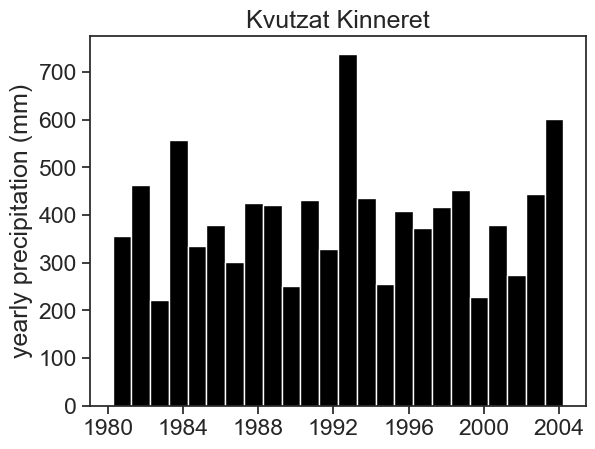

In [5]:
fig, ax = plt.subplots()
ax.bar(df_year.index, df_year['rain'], color='black',
       width=365)
ax.set_ylabel("yearly precipitation (mm)")
ax.set_title("Kvutzat Kinneret")

## When upsampling, how to fill missing values with zero?

We did that in the example above, like this:

```python
df = df.resample('D').asfreq().fillna(0)  # asfreq = replace
```